In [124]:
# Installing the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from pathlib import Path as path

import warnings
warnings.filterwarnings('ignore')

In [125]:
# paths for the directories
home_dir = path.cwd().parent                                  # home directory
data_dir = home_dir / 'data'                                  # data directory
iterim_data_dir = data_dir / 'interim'                        # interim data directory path
dataset_path = iterim_data_dir / "flat-house-dataset_v2.csv"  # dataset path

In [126]:
# loading the dataset into pandas dataframe
df = pd.read_csv(dataset_path)

# checking few rows from the dataset
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
0,flat,umang monsoon breeze,sector 78,0.95,5491.0,1730.0,Built Up area: 1730 (160.72 sq.m.),3.0,3,2,...,NaN,1730.00,NaN,0,0,0,0,0,0,65
1,flat,experion the heartsong,sector 108,1.68,8387.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3.0,3,3+,...,2003.0,1338.29,986.41,1,0,0,1,0,0,86
2,flat,umang winter hills,sector 77,0.75,5588.0,1342.0,Super Built up area 1342(124.68 sq.m.)Built Up...,2.0,2,2,...,1342.0,1140.00,969.00,0,0,0,0,1,0,102
3,flat,shree vardhman flora,sector 90,0.92,4717.0,1950.0,Carpet area: 1950 (181.16 sq.m.),3.0,3,2,...,NaN,NaN,1950.00,0,0,0,1,0,0,49
4,flat,dlf park place,sector 54,4.85,30180.0,1607.0,Super Built up area 1983(184.23 sq.m.)Built Up...,3.0,4,3+,...,1983.0,1785.00,1607.00,1,0,0,0,0,1,158


In [127]:
# Removing the duplicated rows
df = df.drop_duplicates()

In [128]:
# Shape of the dataset
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (3668, 23)


In [129]:
# list of columns in the dataset
print(df.columns)

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'servant room', 'others', 'pooja room', 'study room', 'store room',
       'furnishing_type', 'luxury_score'],
      dtype='object')


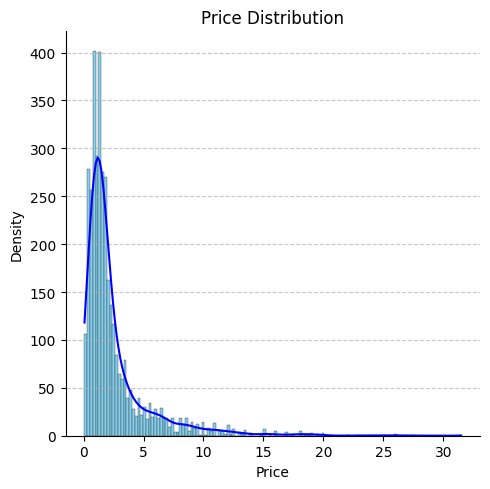

In [130]:
sns.displot(
    df["price"],
    kde=True,  # Maintain kernel density estimation
    color="Blue",  # Use a built-in color like "skyblue"
    facecolor='skyblue'
)

# Improve the look of the plot (same as before)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Density")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add faint gridlines

plt.tight_layout()  # Adjust spacing to prevent clipping
plt.show()


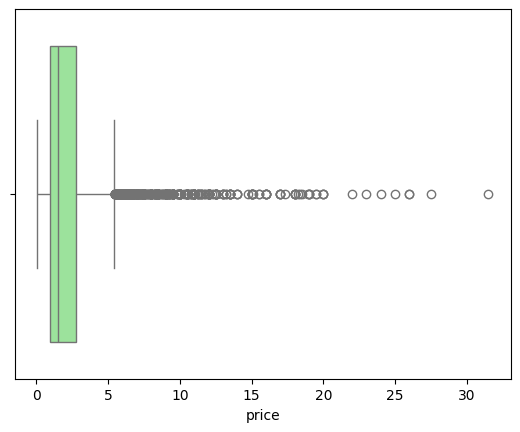

In [131]:
# boxplot
sns.boxplot(df['price'], 
            color='lightgreen',
            orient='h');

In [132]:
# Calculating the IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1 

# define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# identifying the outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some stats about these outliers
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

print(f"Outliers Found in the 'price' feature: {num_outliers}\n"
      f"\nStatistics about the outliers:\n{outliers_price_stats}")


Outliers Found in the 'price' feature: 424

Statistics about the outliers:
count    424.000000
mean       9.240896
std        4.068606
min        5.460000
25%        6.455000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64


In [133]:
# checking the outlier rows from the dataset
outliers.sort_values('price', ascending=False).head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
2068,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.5,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7.0,9,3+,...,NaN,9000.0,NaN,1,0,1,1,1,1,74
3226,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7,3+,...,NaN,11286.0,NaN,1,1,1,1,0,0,42
2833,house,dlf city plots,sector 26,26.0,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7,3+,...,NaN,4545.0,NaN,1,1,1,1,0,0,138
1259,house,independent,sector 26,26.0,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16,3+,...,NaN,400.0,350.0,1,0,1,1,1,1,72
2688,house,suncity township,sector 54,25.0,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4.0,4,3+,...,NaN,1000.0,NaN,1,0,1,1,1,2,0


#### Key Obeservation: 
On the basis of price column we can say that there are some genuine outliers but there are some data errors as well

### Price_per_sqft

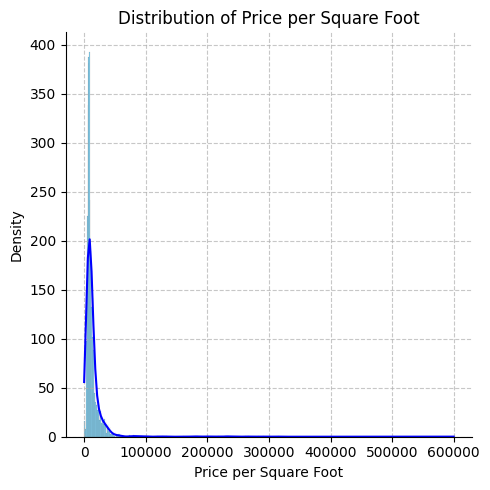

In [134]:
# plotting the distplot
sns.displot(
    df['price_per_sqft'],
    kde=True,  # Maintain kernel density estimation
    color="Blue",  # Use a built-in color like "skyblue"
    facecolor='skyblue',
    )

plt.title("Distribution of Price per Square Foot")
plt.xlabel("Price per Square Foot")
plt.ylabel("Density")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add faint gridlines
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Add faint gridlines


plt.tight_layout()  # Adjust spacing to prevent clipping
plt.show()

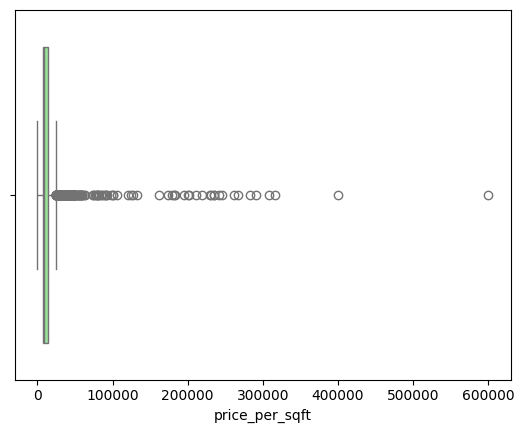

In [135]:
# boxplot
sns.boxplot(df['price_per_sqft'], 
            color='lightgreen',
            orient='h');

In [136]:
# Calculating the IQR
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1 

# define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# identifying the outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some stats about these outliers
num_outliers = outliers_sqft.shape[0]
outliers_price_per_sqft_stats = outliers_sqft['price_per_sqft'].describe()

print(f"Outliers Found in the 'price_per_sqft' feature: {num_outliers}\n"
      f"\nStatistics about the outliers:\n{outliers_price_per_sqft_stats}")


Outliers Found in the 'price_per_sqft' feature: 354

Statistics about the outliers:
count       354.000000
mean      52592.612994
std       61150.458507
min       24489.000000
25%       28208.250000
50%       33368.500000
75%       41982.250000
max      600000.000000
Name: price_per_sqft, dtype: float64


In [137]:
# some area mentioned the dataset are present in 'yard' unit, we will change it to 'sqft' unit
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x: x*9 if x < 1000 else x)

In [138]:
# updating the 'price_per_sqft' column
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000) / outliers_sqft['area'])

In [139]:
# checking the stats updating the dataset
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [140]:
# updating the original dataframe
df.update(outliers_sqft)

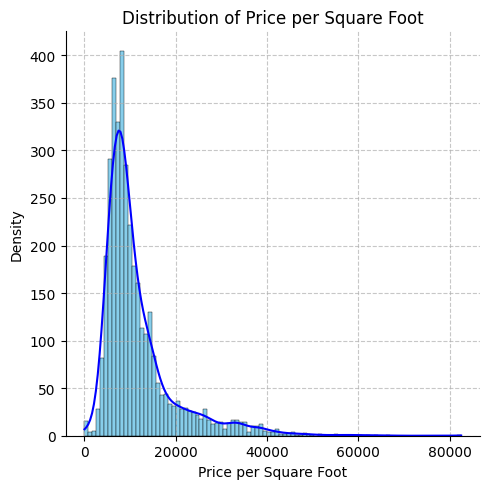

In [141]:
# plotting the distplot
sns.displot(
    df['price_per_sqft'],
    kde=True,  # Maintain kernel density estimation
    color="Blue",  # Use a built-in color like "skyblue"
    facecolor='skyblue',
    )

plt.title("Distribution of Price per Square Foot")
plt.xlabel("Price per Square Foot")
plt.ylabel("Density")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add faint gridlines
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Add faint gridlines


plt.tight_layout()  # Adjust spacing to prevent clipping
plt.show()

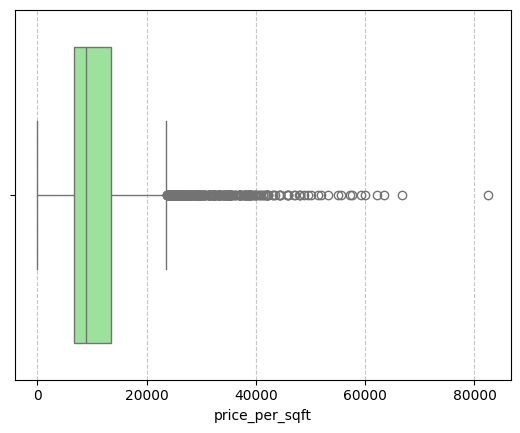

In [142]:
# boxplot
sns.boxplot(df['price_per_sqft'], 
            color='lightgreen',
            orient='h')

plt.grid(axis="x", linestyle="--", alpha=0.7)  # Add faint gridlines

In [143]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
596,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5.0,5,2,...,NaN,400.0,NaN,1,0,1,1,0,0,122
905,house,cloudnine cottages,sector 2,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3.0,3,0,...,NaN,1000.0,NaN,0,0,0,0,0,2,0
1143,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4.0,4,3,...,NaN,250.0,200.0,1,0,1,1,1,0,103
1171,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16.0,17,3+,...,NaN,2430.0,NaN,1,1,1,1,0,1,137
1193,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3.0,3,0,...,NaN,1565.0,NaN,0,0,0,0,0,2,0
1259,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16,3+,...,NaN,400.0,350.0,1,0,1,1,1,1,72
1495,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4.0,4,3+,...,NaN,3240.0,NaN,1,0,1,1,0,1,75
1530,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2.0,1,0,...,NaN,140.0,NaN,0,0,0,0,0,2,0
1600,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12.0,12,3+,...,NaN,1600.0,NaN,0,0,0,0,0,0,99
2148,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4.0,5,3+,...,NaN,2250.0,NaN,1,0,0,1,0,0,160


In [144]:
# we will considering rows where 'price_per_sqft' is less than 50000
df = df[df['price_per_sqft']<=50000]

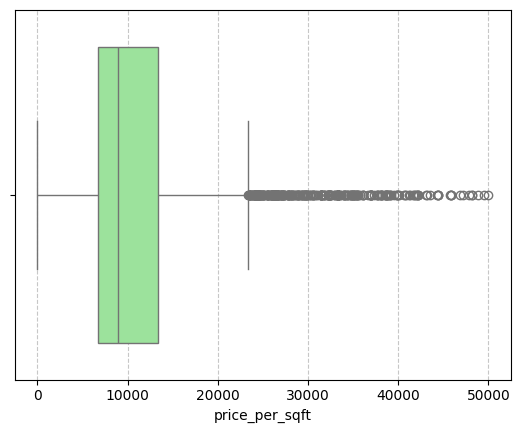

In [145]:
# boxplot
sns.boxplot(
    df['price_per_sqft'], 
    color='lightgreen',
    orient='h');

plt.grid(axis="x", linestyle="--", alpha=0.7)  # Add faint gridlines

### Area

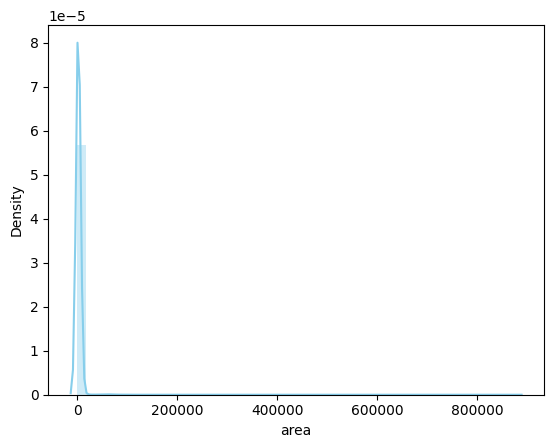

In [158]:
sns.distplot(df['area'], color='Skyblue');

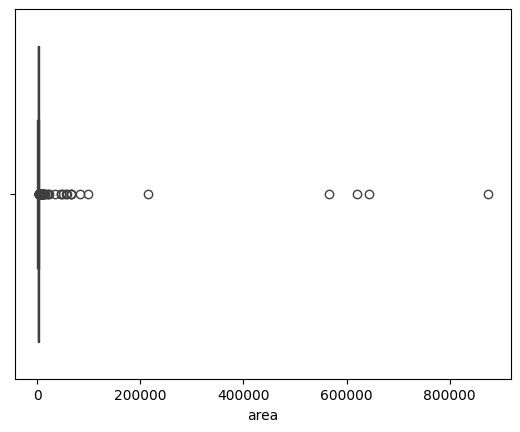

In [159]:
sns.boxplot(df['area'], orient='h');

In [151]:
df['area'].describe()

count      3638.000000
mean       2950.548653
std       23236.672174
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [160]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
109,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2,1,...,NaN,NaN,607936.0,0,1,0,1,0,2,65
220,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5,3+,...,NaN,2.0,NaN,1,1,1,1,0,0,0
617,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2,1,...,NaN,NaN,514396.0,0,0,0,0,0,2,44
3603,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2,2,...,NaN,NaN,569243.0,0,0,0,0,0,2,76
3625,flat,hcbs sports ville,sector 2,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2,2,...,NaN,737147.0,NaN,0,0,0,0,0,1,44


In [161]:
df = df[df['area'] < 100000]

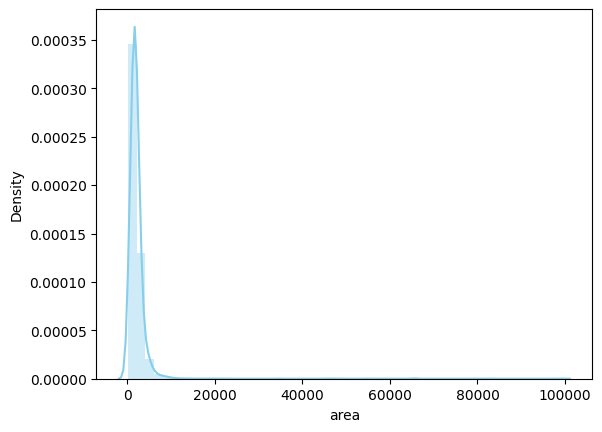

In [166]:
sns.distplot(df['area'], color='Skyblue');

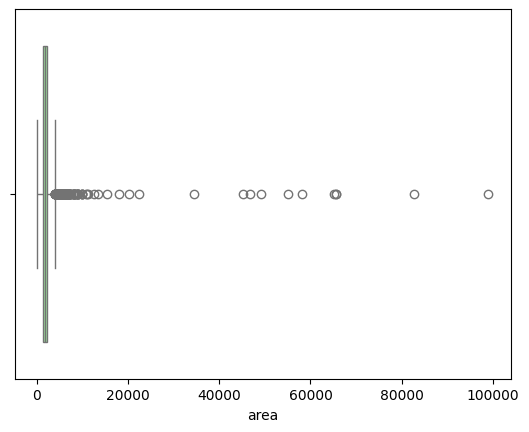

In [167]:
sns.boxplot(x=df['area'], color='lightgreen');

In [170]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# 818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
1865,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8,3+,...,NaN,NaN,11000.00,1,0,1,0,1,0,60
168,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6,2,...,NaN,115.0,NaN,0,1,0,0,0,2,7
2207,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2,1,...,NaN,NaN,64412.00,0,0,0,0,0,2,51
887,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2,2,...,NaN,NaN,64529.00,0,0,0,1,0,2,15
3268,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10,3+,...,NaN,NaN,7250.00,0,0,0,0,0,2,0
1227,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2,1,...,NaN,NaN,58141.00,0,0,0,0,0,2,15
196,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2,1,...,NaN,NaN,54917.00,0,0,0,0,0,2,37
1745,flat,signature the serenas,sector 2,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1,2,...,NaN,NaN,48811.00,0,0,0,1,0,2,37
876,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9,2,...,NaN,5800.0,5200.00,1,0,0,0,1,0,109
2507,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2,1,...,NaN,NaN,45966.00,0,1,0,0,0,2,33
